# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets.interaction import interact_manual
from IPython.html import widgets
from ipython_api import IPythonAPI as iapi
from parameter_definitions import *
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Low_old, Telescopes.SKA1_Mid, Telescopes.SKA1_Mid_old, 
                   Telescopes.SKA1_Sur_old, Telescopes.SKA2_Low, Telescopes.SKA2_Mid)
available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)
available_modes = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.SlowTrans)
verbose_display = False

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Using default values, we can compare telescopes side-by-side

Telescope,SKA1_Mid_rebaselined,SKA1_Mid_rebaselined,
Band,Mid1,Mid1,
Mode,Spectral,Spectral,
BLDTA,False,True,
Max Baseline,150,150,km
Max # channels,65536,65536,
Optimal Number of Facets,5,4,
Optimal Snapshot Time,1.84e+03,1.71e+03,sec.
Visibility Buffer,24.6,3.49,PetaBytes
Working (cache) memory,18.2,42.5,TeraBytes
Image side length,162550,203187,pixels


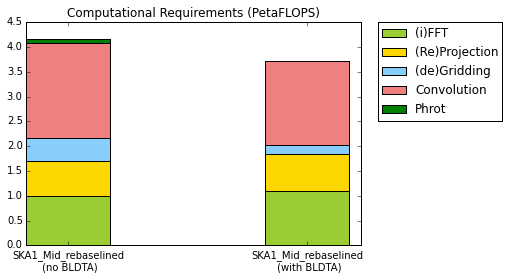

In [2]:
Tel1_BLDTA = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
Tel2_BLDTA = False
interact_manual(iapi.compare_telescopes_default, 
                Telescope_1=available_teles, Telescope_2=available_teles, Band=available_bands, Mode=available_modes,
                Tel1_BLDTA=Tel1_BLDTA, Tel2_BLDTA=Tel2_BLDTA, verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [3]:
BL_dep_time_av = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
interact(iapi.evaluate_telescope_manual, max_baseline=(10,200), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         Telescope=available_teles, Band=available_bands, Mode=available_modes, BL_dep_time_av=BL_dep_time_av, 
         verbose=verbose_display);

Max Baseline,65 km
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Continuum
Tsnap,900.6 sec
Nfacet,5


Visibility Buffer,0.848 PetaBytes
Working (cache) memory,1.07 TeraBytes
Image side length,43470 pixels
I/O Rate,5.4 TeraBytes/s
Total Compute Requirement,4.27 PetaFLOPS
-> Gridding,0.22 PetaFLOPS
-> FFT,0.00814 PetaFLOPS
-> Projection,0.00656 PetaFLOPS
-> Convolution,4.02 PetaFLOPS
-> Phase Rotation,0.0204 PetaFLOPS


### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

Max Baseline,72 km
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Spectral


Optimal Number of Facets,1
Optimal Snapshot Time,115 sec.
Visibility Buffer,29.8 PetaBytes
Working (cache) memory,17.6 TeraBytes
Image side length,133755 pixels
I/O Rate,1.72 TeraBytes/s
Total Compute Requirement,3.87 PetaFLOPS
-> Gridding,0.919 PetaFLOPS
-> FFT,1.05 PetaFLOPS
-> Projection,0.746 PetaFLOPS
-> Convolution,1.16 PetaFLOPS


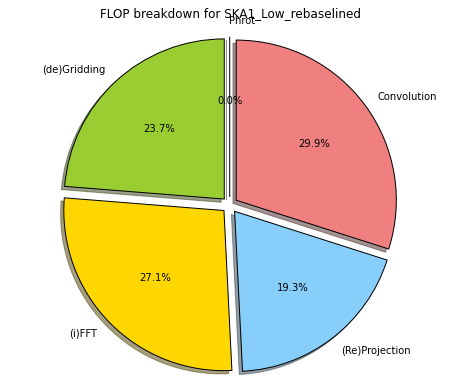

In [4]:
BL_dep_time_av = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10,200), Nf_max = (1,256000,1), Telescope=available_teles, 
         Band=available_bands, Mode=available_modes, BL_dep_time_av=BL_dep_time_av, verbose=verbose_display);